# B-Spline

In [1]:
# INTEREST RATES AND FX MODELS: 1. LIBOR and OIS
# by Andrew Lesniewski

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

from bspline import BSpline

A B-spline of degree $d\geq 0$ is a function $f(t)$ of the form
$$
    f(t) = \sum_{-\infty \leq k \leq \infty} f_k B_k ^{(d)}(t)
$$

Where we define, for a sequence of knot points $\{t_k\}_{- \infty \leq k \leq \infty}$

$$B_k^{(0)}(t) =
    \begin{cases}
    1 & t_k \leq t < t_{k+1} \\
    0 & \text{otherwise}
    \end{cases}
$$

And, recursively, for $d\geq 1$,
$$
   B_k^{(d)}(t) = \frac{t - t_k}{t_{k+d} - t_k} B_k^{(d-1)}(t) + \frac{t_{k+d+1} - t}{t_{k+d+1} - t_{k+1}} B_{k+1}^{(d-1)}(t)
$$

<IPython.core.display.Javascript object>


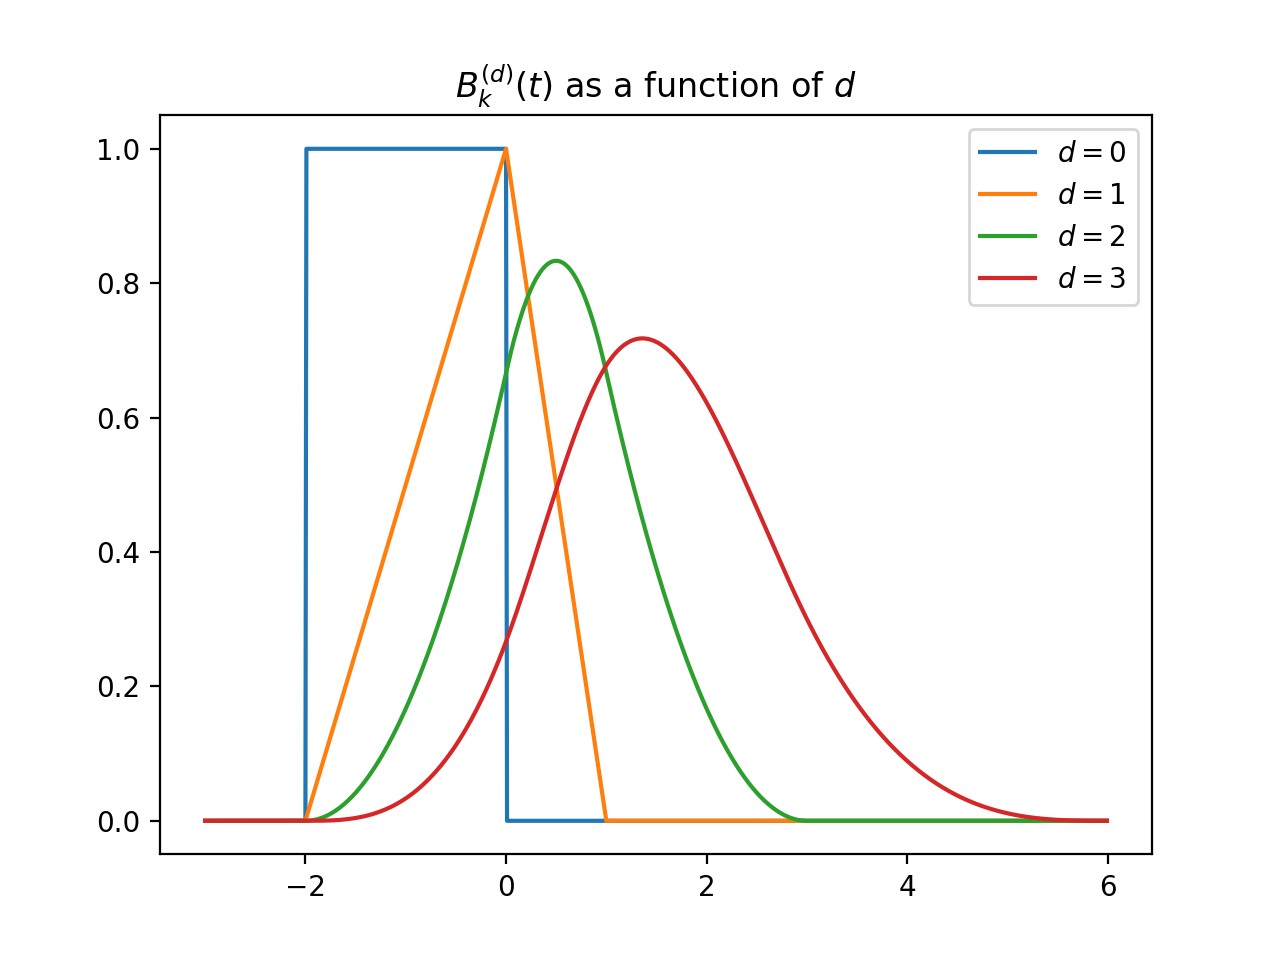

In [6]:
knots = np.array([-3, -2, 0, 1, 3, 6])
T = np.arange(-3, 6, 0.01)

for d in range(4):
    bspline = BSpline(knots, d)
    plt.plot(T, bspline.eval(T, 1), label="$d={}$".format(d))
    
plt.legend()
plt.title(r"$B_k^{(d)}(t)$ as a function of $d$")

<IPython.core.display.Javascript object>


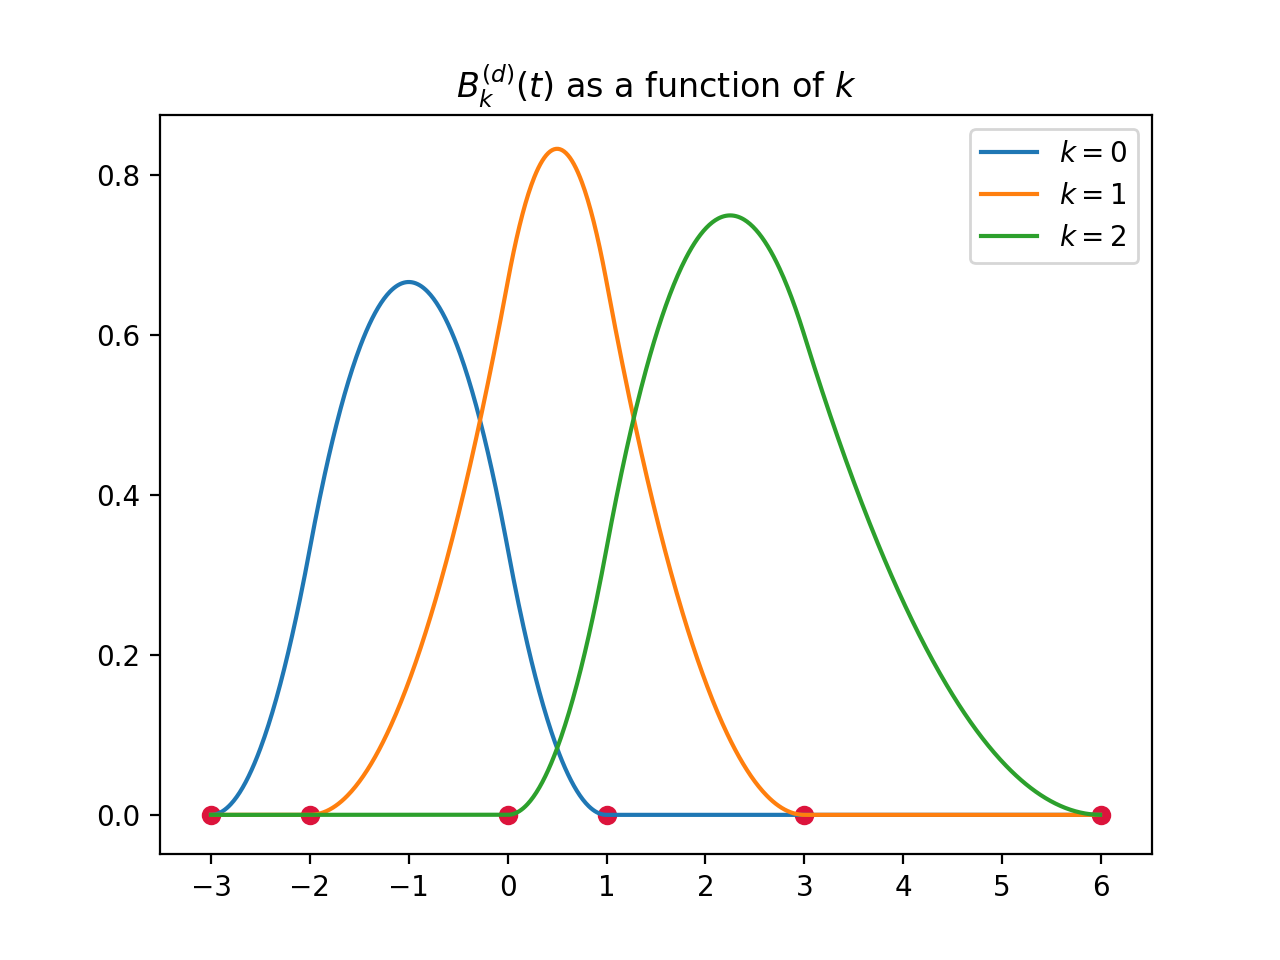

In [10]:
degree = 2
bs1 = BSpline(knots, degree)

for k in range(3):
    plt.plot(T, bs1.eval(T, k), label="$k={}$".format(k))
plt.scatter(bs1.knots, np.zeros(len(bs1.knots)), c="crimson")
plt.legend()
plt.xticks(range(-3,7))
plt.title(r"$B_k^{(d)}(t)$ as a function of $k$")

For the derivative we have the following recursion
$$
    \frac{d}{dt}B_{d}^{k}(t) = \frac{d}{t_{k+d} - t_k}B_{d-1}^{k}(t) - \frac{d}{t_{k+d+1} - t_{k+1}}B_{d-1}^{k+1}(t)
$$



In [179]:
def deriv_Bd_k(T, t, k, d):
    # B_k^{(d-1)}(t)
    B_k_dm1_t = Bd_k(T, t, k, d-1)
    # B_{k+1}^{(d-1)}(t)
    B_kp1_dm1_t = Bd_k(T, t, k+1, d-1)
    
    term1 = d / (T[k + d] - T[k])
    term2 = d / (T[k + d + 1] - T[k + 1])
    
    return term1 * B_k_dm1_t + term2 * B_kp1_dm1_t

The integral from $-\infty$ to $t$ can be expressed in terms of a sum as follows:
$$
    \int_{-\infty}^{t} B_k^{(d)}(s) ds = \sum_{i=k}^{\infty}\frac{t_{k+d+1}- t_k}{d + 1}B_i^{(d+1)}(t)
$$

Where we require at least $d + 2$ knot points greater than or equal to $t$

In [187]:
def int_Bd_k(T, t, k, d):
    """
    Compute the intergal for the B-Spline
    """
    